In [31]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt
from math import log, exp, ceil

## Сравнение оценок среднего значения выборки случайных величин распределённых по закону N(0, 25)

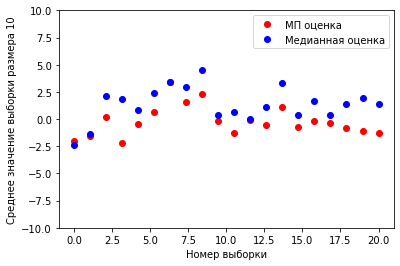

In [2]:
size = 20

def create_norm_samples(sample_size):
    norm = sps.norm(0, 5)
    samples = []
    for i in range(size):
        samples.append(norm.rvs(sample_size))
    return samples


def mp_estimate(sample):
    return np.mean(sample)


def median_estimate(sample):
    n = len(sample)
    sample = np.sort(sample)
    mid = int(n / 2 + 1)
    return sample[mid]


def create_estimates(samples):
    mp_est = []
    median_est = []
    for i in range(size):
        mp_est.append(mp_estimate(samples[i]))
        median_est.append(median_estimate(samples[i]))
    return mp_est, median_est


def plot_estimates(sample_size, mp_est, median_est):
    X = np.linspace(0, size, size)
    plt.axis([-1, 21, -10, 10])
    plt.plot(X, mp_est, 'ro')
    plt.plot(X, median_est, 'bo')
    plt.legend(['МП оценка', 'Медианная оценка'])
    plt.xlabel("Номер выборки")
    plt.ylabel("Среднее значение выборки размера " + str(sample_size))


samples10 = create_norm_samples(10)
mp_est10, median_est10 = create_estimates(samples10)
plot_estimates(10, mp_est10, median_est10)

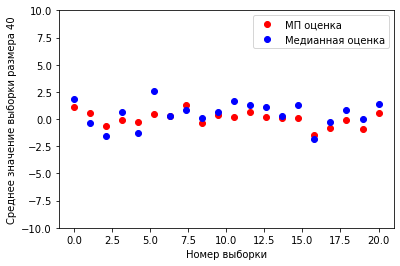

In [3]:
samples40 = create_norm_samples(40)
mp_est40, median_est40 = create_estimates(samples40)
plot_estimates(40, mp_est40, median_est40)

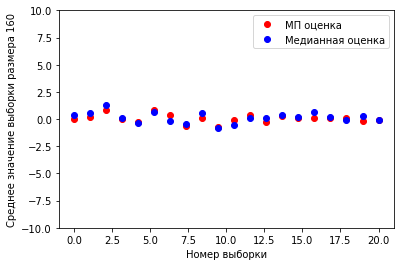

In [4]:
samples160 = create_norm_samples(160)
mp_est160, median_est160 = create_estimates(samples160)
plot_estimates(160, mp_est160, median_est160)

In [5]:
def create_table(mp_est, median_est):
    min_mp = min(mp_est)
    max_mp = max(mp_est)
    min_median = min(median_est)
    max_median = max(median_est)
    range_mp = max_mp - min_mp
    range_median = max_median - min_median
    mp_std_dev = np.std(mp_est)
    median_std_dev = np.std(median_est)
    data = pd.DataFrame(columns=['Оценка максимального правдоподобия', 'Медианная оценка'],
                        data=[[min_mp, min_median], [max_mp, max_median], [range_mp, range_median], [mp_std_dev, median_std_dev]])
    data.index = ['min', 'max', 'range', 'std dev']
    return data


create_table(mp_est10, median_est10)

,Оценка максимального правдоподобия,Медианная оценка
min,-2.243556,-2.345832
max,3.419584,4.493339
range,5.663140,6.839172
std dev,1.388548,1.572449


In [6]:
create_table(mp_est40, median_est40)

,Оценка максимального правдоподобия,Медианная оценка
min,-1.504747,-1.815068
max,1.299972,2.624656
range,2.804719,4.439723
std dev,0.668499,1.108192


In [7]:
create_table(mp_est160, median_est160)

,Оценка максимального правдоподобия,Медианная оценка
min,-0.759653,-0.851468
max,0.877895,1.274846
range,1.637548,2.126313
std dev,0.389473,0.479773


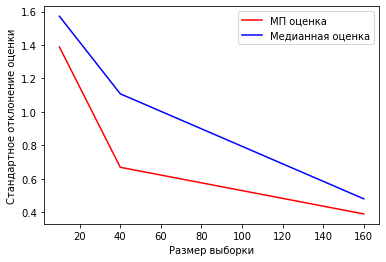

In [8]:
def plot_std_dev():
    mp_std_dev10 = np.std(mp_est10)
    mp_std_dev40 = np.std(mp_est40)
    mp_std_dev160 = np.std(mp_est160)
    median_std_dev10 = np.std(median_est10)
    median_std_dev40 = np.std(median_est40)
    median_std_dev160 = np.std(median_est160)
    plt.plot([10, 40, 160], [mp_std_dev10, mp_std_dev40, mp_std_dev160], 'r-')
    plt.plot([10, 40, 160], [median_std_dev10, median_std_dev40, median_std_dev160], 'b-')
    plt.legend(['МП оценка', 'Медианная оценка'])
    plt.xlabel('Размер выборки')
    plt.ylabel('Стандартное отклонение оценки')

plot_std_dev()

## Сравнение оценок параметра экспоненциального распределения по выборке случайных величин Exp(5)

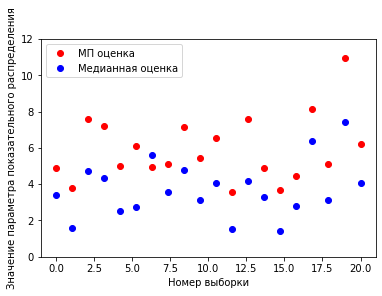

In [9]:
def create_expon_samples(sample_size):
    expon = sps.expon(0, 0.2)
    samples = []
    for i in range(size):
        samples.append(expon.rvs(sample_size))
    return samples


def mp_estimate(sample):
    return len(sample) / np.sum(sample)


def median_estimate(sample):
    n = len(sample)
    sample = np.sort(sample)
    mid = int(n / 2 + 1)
    return log(2.0) / sample[mid]


def create_estimates(samples):
    mp_est = []
    median_est = []
    for i in range(size):
        mp_est.append(mp_estimate(samples[i]))
        median_est.append(median_estimate(samples[i]))
    return mp_est, median_est


def plot_estimates(mp_est, median_est):
    X = np.linspace(0, size, size)
    plt.axis([-1, 21, 0, 12])
    plt.plot(X, mp_est, 'ro')
    plt.plot(X, median_est, 'bo')
    plt.legend(['МП оценка', 'Медианная оценка'])
    plt.xlabel("Номер выборки")
    plt.ylabel("Значение параметра показательного распределения")


samples10 = create_expon_samples(10)
mp_est10, median_est10 = create_estimates(samples10)
plot_estimates(mp_est10, median_est10)

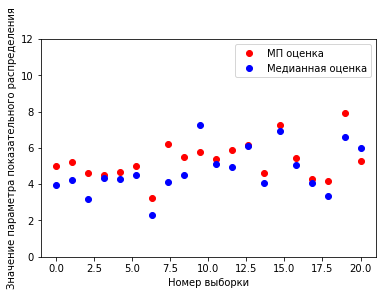

In [10]:
samples40 = create_expon_samples(40)
mp_est40, median_est40 = create_estimates(samples40)
plot_estimates(mp_est40, median_est40)

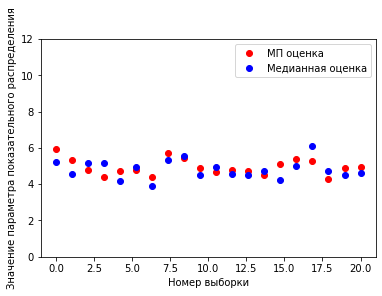

In [11]:
samples160 = create_expon_samples(160)
mp_est160, median_est160 = create_estimates(samples160)
plot_estimates(mp_est160, median_est160)

In [12]:
create_table(mp_est10, median_est10)

,Оценка максимального правдоподобия,Медианная оценка
min,3.545441,1.437069
max,10.974385,7.435719
range,7.428944,5.998650
std dev,1.767327,1.519139


In [13]:
create_table(mp_est40, median_est40)

,Оценка максимального правдоподобия,Медианная оценка
min,3.253477,2.318751
max,7.940193,7.264073
range,4.686716,4.945322
std dev,1.040256,1.250855


In [14]:
create_table(mp_est160, median_est160)

,Оценка максимального правдоподобия,Медианная оценка
min,4.298458,3.908749
max,5.964077,6.085583
range,1.665618,2.176834
std dev,0.436428,0.497683


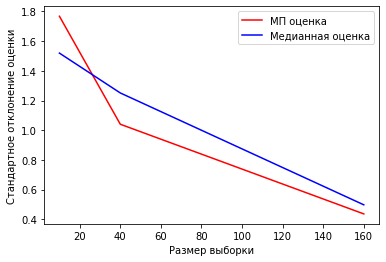

In [15]:
plot_std_dev()

## Задача №1 (вариант №8)
Завод выпустил партию из N=1500 приборов, предназначенных для непрерывной работы под водой в течение T=70 часов.
На испытания поставлены n=30 приборов. Результаты испытаний на продолжительность оказались x_1,x_2,…,x_n.
Оценить количество неработоспособных приборов и их стоимость.

Считать:
1. Продолжительность X непрерывной работы случайной величиной, имеющей показательное распределение;
2. C=300 руб. – стоимость одного прибора;
3. Среднее значение принять m=600 часов.

In [16]:
size = 20
sample_size = 30
expon = sps.expon(scale=600)
samples = expon.rvs((size, sample_size))

In [17]:
def mp_estimate(sample):
    return len(sample) / np.sum(sample)


mp_est = []
for i in range(size):
    mp_est.append(mp_estimate(samples[i]))

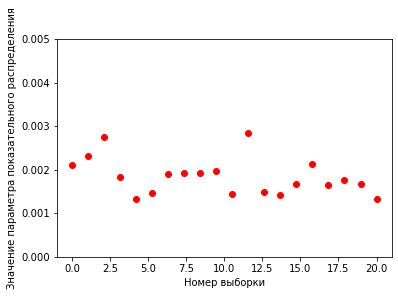

In [18]:
def plot_estimate(est, yrange, ylabel):
    X = np.linspace(0, size, size)
    plt.axis([-1, 21, yrange[0], yrange[1]])
    plt.plot(X, est, 'ro')
    plt.xlabel("Номер выборки")
    plt.ylabel(ylabel)


plot_estimate(mp_est, yrange=[0, 0.005], ylabel='Значение параметра показательного распределения')

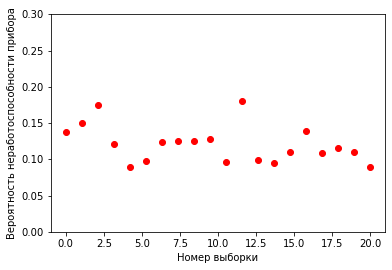

In [19]:
def prob_estimate(mp_est):
    return 1 - exp(-70.0 * mp_est)


prob_est = []
for i in range(size):
    prob_est.append(prob_estimate(mp_est[i]))

plot_estimate(prob_est, yrange=[0, 0.3], ylabel='Вероятность неработоспособности прибора')

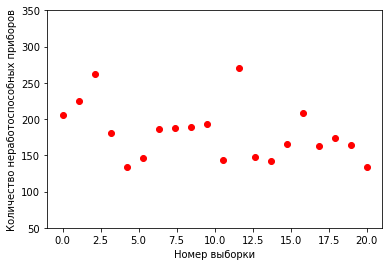

In [20]:
def broken_estimate(prob_est):
    return 1500*prob_est


broken_est = []
for i in range(size):
    broken_est.append(broken_estimate(prob_est[i]))

plot_estimate(broken_est, yrange=[50, 350], ylabel='Количество неработоспособных приборов')

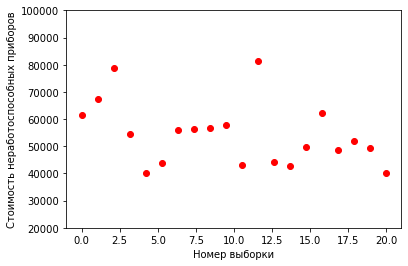

In [21]:
def price_estimate(broken_est):
    return 300*broken_est


price_est = []
for i in range(size):
    price_est.append(price_estimate(broken_est[i]))

plot_estimate(price_est, yrange=[20000, 100000], ylabel='Стоимость неработоспособных приборов')

In [22]:
def create_table(est, label):
    min_est = min(est)
    max_est = max(est)
    range_est = max_est - min_est
    est_std_dev = np.std(est)
    data = pd.DataFrame(columns=[label],
                        data=[[min_est], [max_est], [range_est], [est_std_dev]])
    data.index = ['min', 'max', 'range', 'std dev']
    return data


table = create_table(mp_est, label='Оценка параметра показательного распределения')
table = table.join(create_table(prob_est, label='Оценка вероятности неисправности прибора'))
table = table.join(create_table(broken_est, label='Оценка количества неисправных приборов'))
table = table.join(create_table(price_est, label='Оценка стоимости всех неисправных приборов'))
table

,Оценка параметра показательного распределения,Оценка вероятности неисправности прибора,Оценка количества неисправных приборов,Оценка стоимости всех неисправных приборов
min,0.001334,0.089159,133.738640,40121.592016
max,0.002848,0.180728,271.092540,81327.761951
range,0.001514,0.091569,137.353900,41206.169936
std dev,0.000417,0.025341,38.010896,11403.268880


## Оценка на одной выборке

In [43]:
sample = expon.rvs(sample_size)
sample

array([1642.20059891,  283.56831137,   12.76610747,  710.58711896,
        136.85581723,  232.72791503,  537.72232754,  900.43336742,
        110.85066873,  769.30730905,  132.58571313,    9.38209194,
        629.33269912,  299.62559744,    3.40732911,  398.99722208,
         10.35503726, 1894.87050064,   29.43258871,   99.09723382,
        639.6286286 ,   96.6705689 , 2324.03979932,    5.61553696,
        187.33753275, 2154.85348352,    9.87350673,  480.52237179,
        741.51917875,  852.2762292 ])

Text(0, 0.5, 'Время непрерывной работы (ч.)')

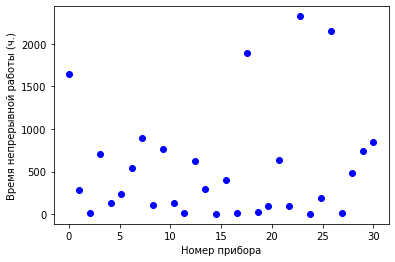

In [48]:
X = np.linspace(0, sample_size, sample_size)
plt.plot(X, sample, 'bo')
plt.xlabel('Номер прибора')
plt.ylabel('Время непрерывной работы (ч.)')

In [45]:
param = mp_estimate(sample)
prob = prob_estimate(param)
broken = ceil(broken_estimate(prob))
price = price_estimate(broken)

result = pd.DataFrame(data=[[param], [prob], [broken], [price]], columns=['Значение оценки'])
result.index = ["Параметр показательного распределения",
                "Вероятность поломки прибора",
                "Количество неработоспособных приборов (округлённое)",
                "Стоимость неработоспособных приборов"]
result


,Значение оценки
Параметр показательного распределения,0.001836
Вероятность поломки прибора,0.120628
Количество неработоспособных приборов (округлённое),181.000000
Стоимость неработоспособных приборов,54300.000000
